In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py 
py.init_notebook_mode(connected=True)                  
import plotly.graph_objs as go                         
import plotly.tools as tls                             
from collections import Counter                        
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV                                         # to split the data
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score     # to evaluate our model
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


from question_mark_utils import check_question_marks, print_question_mark_results
from check_categorical import identify_categorical_columns

import warnings
import missingno as msno
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [83]:


# print("Path to dataset files:", path)


# df = pd.read_csv("/home/zgh/myprojects_on_github/machine-learning-projects/Emergency_Service - Triage/data.csv",sep=';')
df = pd.read_csv("/home/zgh/myprojects_on_github/machine-learning-projects/Emergency_Service - Triage/data.csv", sep=';', encoding='latin1')



In [84]:
# The first 5 observation units of the data set were accessed.
df.head()


,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,160,100,84,18,36.6,100,2,Corneal abrasion,1,4,2,86,"5,00",1
1,1,1,56,12,3,2,right forearm burn,1,1,2,137,75,60,20,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,"3,95",1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,130,80,102,20,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,"1,00",1
3,1,2,71,8,1,1,ascites tapping,1,1,3,139,94,88,20,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,"9,83",1
4,1,2,58,4,3,1,"distension, abd",1,1,3,91,67,93,18,36.5,NaN,4,Ascites,1,5,8,109,"6,60",1


In [85]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

In [86]:
# The size of the data set
# df

In [87]:
# Descriptive statistics of the data set accessed.
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Group,1267.000,1.457,0.498,1.000,1.000,1.000,2.000,2.000
Sex,1267.000,1.522,0.500,1.000,1.000,2.000,2.000,2.000
Age,1267.000,54.424,19.725,16.000,37.000,57.000,71.000,96.000
Patients number per hour,1267.000,7.519,3.161,1.000,5.000,7.000,10.000,17.000
Arrival mode,1267.000,2.821,0.808,1.000,2.000,3.000,3.000,7.000
Injury,1267.000,1.193,0.394,1.000,1.000,1.000,1.000,2.000
Mental,1267.000,1.106,0.448,1.000,1.000,1.000,1.000,4.000
Pain,1267.000,0.564,0.496,0.000,0.000,1.000,1.000,1.000
KTAS_RN,1267.000,3.335,0.885,1.000,3.000,3.000,4.000,5.000
Disposition,1267.000,1.609,1.158,1.000,1.000,1.000,2.000,7.000


In [88]:
# Are there any null values?
df.isnull().values.any()

np.True_

In [89]:
#Missing Value Analysis
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    print(n_miss)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na

df['NRS_pain'] = df[["NRS_pain"]].replace("#BOÞ!",np.nan)

missing_values_table(df)

Saturation         688
NRS_pain           556
Diagnosis in ED      2
dtype: int64
                 n_miss  ratio
Saturation          688 54.300
NRS_pain            556 43.880
Diagnosis in ED       2  0.160


['NRS_pain', 'Saturation', 'Diagnosis in ED']

In [90]:
# Fill Missing Value

#groupby and then calc mode Avoids Bias: Prevents leakage between unrelated groups.
#For categorical or discrete numeric columns (mode is meaningful)

#These two columns(mistriage) together provide important context about the patient's actual severity and triage accuracy

# print(df.groupby(["mistriage", "KTAS_expert"])["NRS_pain"].describe())
df["NRS_pain"] = df.groupby(["mistriage", "KTAS_expert"])["NRS_pain"].transform(lambda x: x.fillna(x.mode()[0]))
print(df["NRS_pain"])
df["Saturation"] = df.groupby(["mistriage", "KTAS_expert"])["Saturation"].transform(lambda x: x.fillna(x.mode()[0]))
df["Diagnosis in ED"] = df.groupby(["mistriage", "KTAS_expert"])["Diagnosis in ED"].transform(lambda x: x.fillna(x.mode()[0]))


0       2
1       2
2       2
3       3
4       3
       ..
1262    3
1263    3
1264    5
1265    5
1266    5
Name: NRS_pain, Length: 1267, dtype: object


In [91]:
df.isnull().values.any()

np.False_

<Axes: >

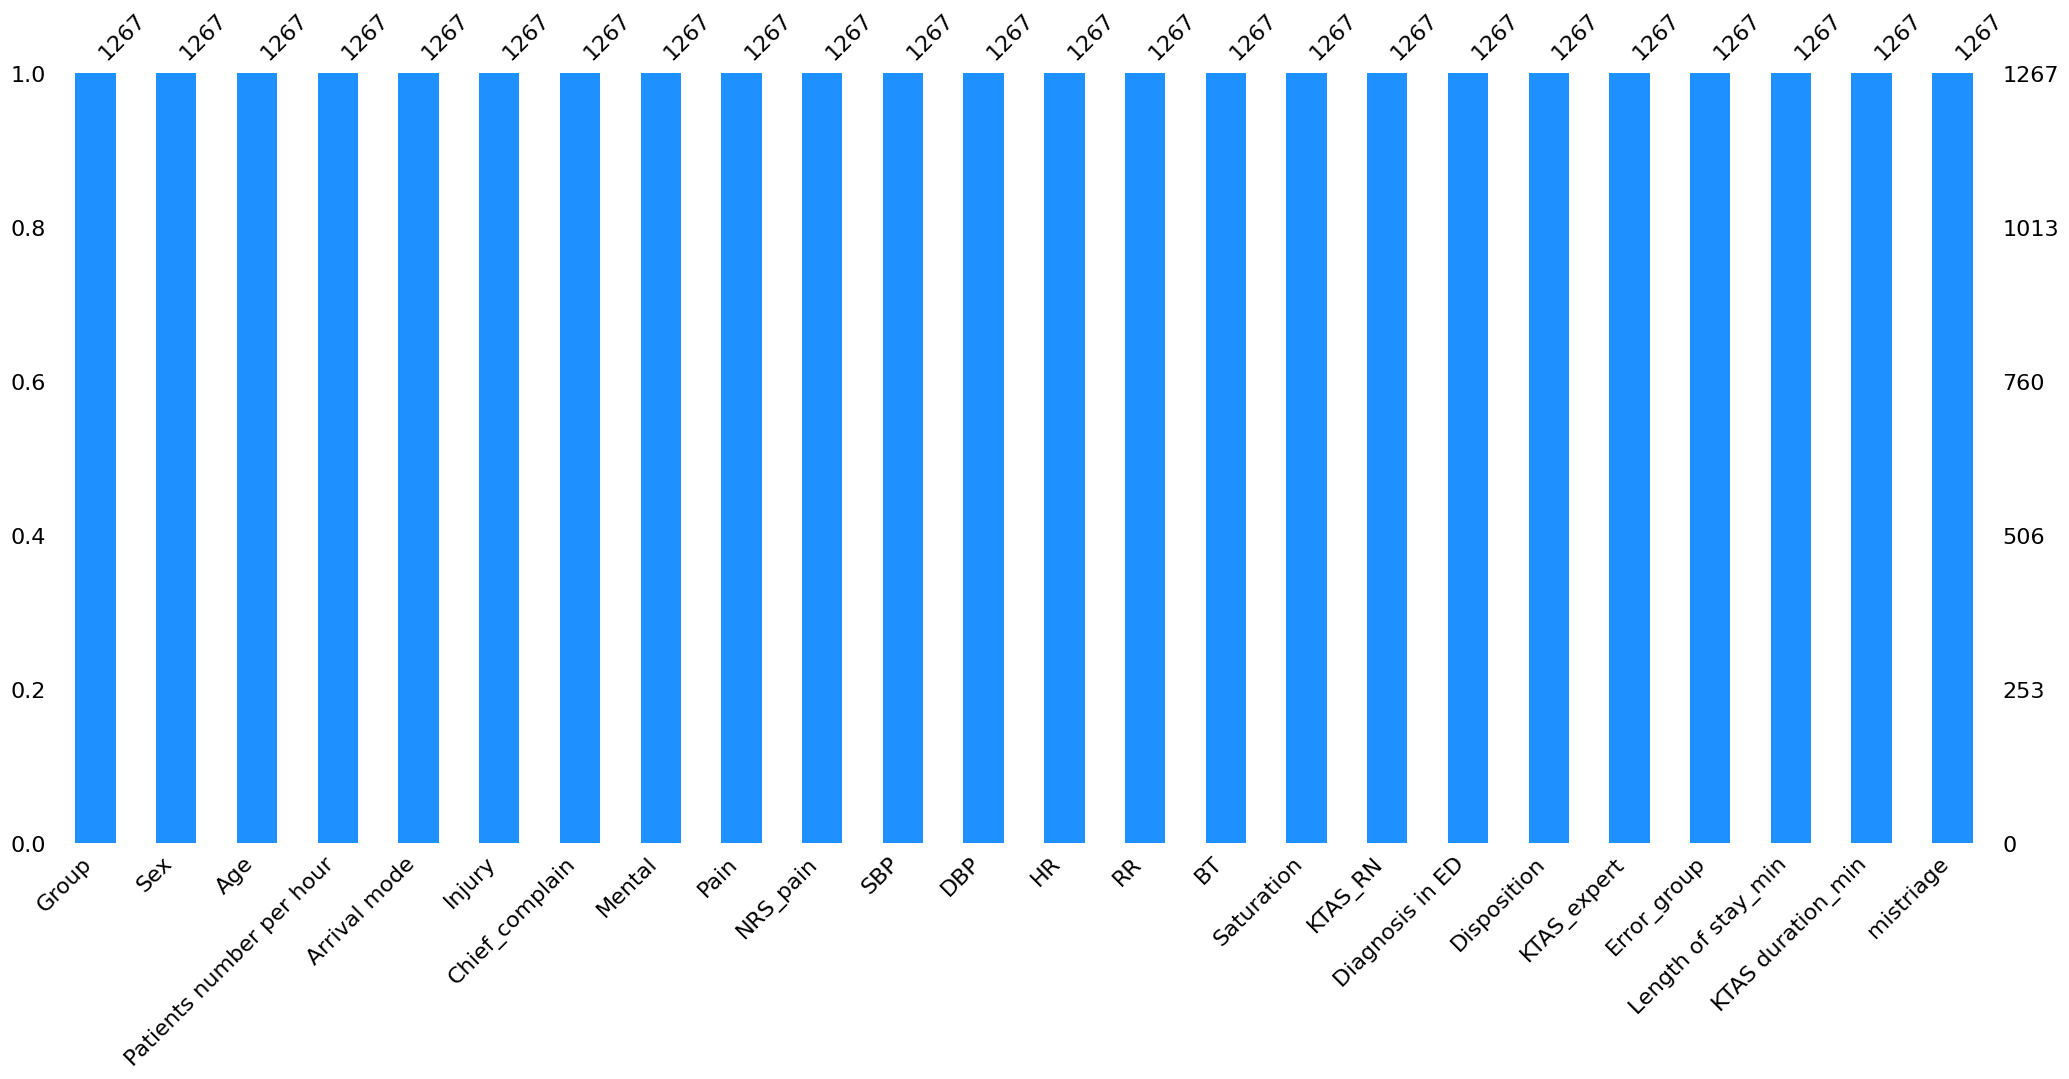

In [92]:
msno.bar(df, color="dodgerblue")


In [93]:
#feature engineering

injury_cat = ['No','Yes']
sex_cat = ['Female','Male']
pain_cat = ['No','Yes']
mental_cat = ['Alert','Verbose Response','Pain Response','Unresponsive']
group_cat = ['Local ED (3th Degree)', 'Regional ED (4th Degree)']
arrival_mode_cat = ['Walking','Public Ambulance', 'Private Vehicle','Private Ambulance', 'Other','Other','Other']
disposition_cat = ['Discharge', 'Admission to Ward', 'Admission to ICU', 'Discharge', 'Transfer', 'Death', 'Surgery']
KTAS_cat = ['Emergency','Emergency','Emergency', 'Non-Emergency', 'Non-Emergency']
mistriage_cat = ['Normal Triage','Over Triage','Under Triage']

df['KTAS duration_min'] = df['KTAS duration_min'].apply(lambda x: int(float(x.replace(',', '.'))))
df['NRS_pain'] = df['NRS_pain'].apply(lambda x:int(x))


###############################################################################################################################
#Categorical data were entered as numerical data. Therefore, it was categorized again categorically to make it more meaningful. 
###############################################################################################################################

df.loc[df["Sex"] == 1, "Sex"] = sex_cat[0]

df.loc[df["Sex"] == 2, "Sex"] = sex_cat[1]

df.loc[df["Injury"] == 1, "Injury"] = injury_cat[0]
df.loc[df["Injury"] == 2, "Injury"] = injury_cat[1]

df.loc[df["Pain"] == 0, "Pain"] = pain_cat[0]
df.loc[df["Pain"] == 1, "Pain"] = pain_cat[1]

df.loc[df["Mental"] == 1, "Mental"] = mental_cat[0]
df.loc[df["Mental"] == 2, "Mental"] = mental_cat[1]
df.loc[df["Mental"] == 3, "Mental"] = mental_cat[2]
df.loc[df["Mental"] == 4, "Mental"] = mental_cat[3]

df.loc[df["Group"] == 1, "Group"] = group_cat[0]
df.loc[df["Group"] == 2, "Group"] = group_cat[1]

df.loc[df["Arrival mode"] == 1, "Arrival mode"] = arrival_mode_cat[0]
df.loc[df["Arrival mode"] == 2, "Arrival mode"] = arrival_mode_cat[1]
df.loc[df["Arrival mode"] == 3, "Arrival mode"] = arrival_mode_cat[2]
df.loc[df["Arrival mode"] == 4, "Arrival mode"] = arrival_mode_cat[3]
df.loc[df["Arrival mode"] == 5, "Arrival mode"] = arrival_mode_cat[4]
df.loc[df["Arrival mode"] == 6, "Arrival mode"] = arrival_mode_cat[5]
df.loc[df["Arrival mode"] == 7, "Arrival mode"] = arrival_mode_cat[6]

df.loc[df["Disposition"] == 1, "Disposition"] = disposition_cat[0]
df.loc[df["Disposition"] == 2, "Disposition"] = disposition_cat[1]
df.loc[df["Disposition"] == 3, "Disposition"] = disposition_cat[2]
df.loc[df["Disposition"] == 4, "Disposition"] = disposition_cat[3]
df.loc[df["Disposition"] == 5, "Disposition"] = disposition_cat[4]
df.loc[df["Disposition"] == 6, "Disposition"] = disposition_cat[5]
df.loc[df["Disposition"] == 7, "Disposition"] = disposition_cat[6]

df.loc[df["KTAS_RN"] == 1, "KTAS_RN"] = KTAS_cat[0]
df.loc[df["KTAS_RN"] == 2, "KTAS_RN"] = KTAS_cat[1]
df.loc[df["KTAS_RN"] == 3, "KTAS_RN"] = KTAS_cat[2]
df.loc[df["KTAS_RN"] == 4, "KTAS_RN"] = KTAS_cat[3]
df.loc[df["KTAS_RN"] == 5, "KTAS_RN"] = KTAS_cat[4]

df.loc[df["KTAS_expert"] == 1, "KTAS_expert"] = KTAS_cat[0]
df.loc[df["KTAS_expert"] == 2, "KTAS_expert"] = KTAS_cat[1]
df.loc[df["KTAS_expert"] == 3, "KTAS_expert"] = KTAS_cat[2]
df.loc[df["KTAS_expert"] == 4, "KTAS_expert"] = KTAS_cat[3]
df.loc[df["KTAS_expert"] == 5, "KTAS_expert"] = KTAS_cat[4]

df.loc[df["mistriage"] == 0, "mistriage"] = mistriage_cat[0]
df.loc[df["mistriage"] == 1, "mistriage"] = mistriage_cat[1]
df.loc[df["mistriage"] == 2, "mistriage"] = mistriage_cat[2]
###############################################################################################################################
##############               Nonsense data was encountered in variables containing numerical data.                 ############
##############                 These values have been replaced by the mode of the variable.                        ############
###############################################################################################################################

#check which columns have question marks

# Check for question marks
results = check_question_marks(df)

# Print the results
print_question_mark_results(results)

df[["SBP","DBP","HR","RR","BT","Saturation"]] = df[["SBP","DBP","HR","RR","BT","Saturation"]].replace("??",0).astype(str).astype(float)
df['SBP'] = df['SBP'].replace(0,df['SBP'].mode()[0])
df['DBP'] = df['DBP'].replace(0,df['DBP'].mode()[0])
df
# chief_complaint Should NOT use mode
# This is a text field with unique complaints
#  mode replacement wouldn't make sense for text descriptions

###############################################################################################################################
##############                                        Feature Engineering                                          ############
###############################################################################################################################
interval = (0, 25, 45, 60, 100)
cats = ['Young', 'Adult', 'Mid_Age', 'Old']
df["New_Age"] = pd.cut(df.Age, interval, labels=cats)

df.loc[df['SBP'] < 80, 'New_SBP'] = 'Low'
df.loc[(df["SBP"] >= 80) & (df["SBP"] <= 120), 'New_SBP'] = 'Normal'
df.loc[df['SBP'] > 120, 'New_SBP'] = 'High'

df.loc[df['DBP'] < 60, 'New_DBP'] = 'Low'
df.loc[(df["DBP"] >= 60) & (df["DBP"] <= 80), 'New_DBP'] = 'Normal'
df.loc[df['DBP'] > 80, 'New_DBP'] = 'High'

df.loc[df['HR'] < 45, 'New_HR'] = 'Low'
df.loc[(df["HR"] >= 45) & (df["HR"] <= 100), 'New_HR'] = 'Normal'
df.loc[df['HR'] > 100, 'New_HR'] = 'High'

df.loc[df['RR'] < 12, 'New_RR'] = 'Low'
df.loc[(df["RR"] >= 12) & (df["RR"] <= 25), 'New_RR'] = 'Normal'
df.loc[df['RR'] > 25, 'New_RR'] = 'High'

df.loc[df['BT'] < 36.4, 'New_BT'] = 'Low'
df.loc[(df["BT"] >= 36.4) & (df["BT"] <= 37.6), 'New_BT'] = 'Normal'
df.loc[df['BT'] > 37.6, 'New_BT'] = 'High'

df.loc[df['NRS_pain'] < 3, 'New_NRS_pain'] = 'Low Pain'
df.loc[(df["NRS_pain"] >= 3) & (df["NRS_pain"] <= 7), 'New_NRS_pain'] = 'Pain'
df.loc[df['NRS_pain'] > 7, 'New_NRS_pain'] = 'High Pain'

df.loc[df['KTAS duration_min'] < 10, 'New_KTAS_duration_min'] = 'Immediate'
df.loc[(df["KTAS duration_min"] >= 10) & (df["KTAS duration_min"] <= 60), 'New_KTAS_duration_min'] = 'Very Urgent'
df.loc[(df["KTAS duration_min"] >= 61) & (df["KTAS duration_min"] <= 120), 'New_KTAS_duration_min'] = 'Urgent'
df.loc[(df["KTAS duration_min"] >= 121) & (df["KTAS duration_min"] <= 240), 'New_KTAS_duration_min'] = 'Standart'
df.loc[df['KTAS duration_min'] > 240, 'New_KTAS_duration_min'] = 'Non-Urgent'

df.loc[df['Length of stay_min'] < 10, 'New_Length_of_stay_min'] = 'Immediate'
df.loc[(df["Length of stay_min"] >= 10) & (df["Length of stay_min"] <= 60), 'New_Length_of_stay_min'] = 'Very Urgent'
df.loc[(df["Length of stay_min"] >= 61) & (df["Length of stay_min"] <= 120), 'New_Length_of_stay_min'] = 'Urgent'
df.loc[(df["Length of stay_min"] >= 121) & (df["Length of stay_min"] <= 240), 'New_Length_of_stay_min'] = 'Standart'
df.loc[df['Length of stay_min'] > 240, 'New_Length_of_stay_min'] = 'Non-Urgent'

df

Columns containing '?' values:
- Chief_complain (22 occurrences)
  Examples: ??, ??, ??

- SBP (25 occurrences)
  Examples: ??, ??, ??

- DBP (29 occurrences)
  Examples: ??, ??, ??

- HR (20 occurrences)
  Examples: ??, ??, ??

- RR (22 occurrences)
  Examples: ??, ??, ??

- BT (18 occurrences)
  Examples: ??, ??, ??

- Saturation (16 occurrences)
  Examples: ??, ??, ??



,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage,New_Age,New_SBP,New_DBP,New_HR,New_RR,New_BT,New_NRS_pain,New_KTAS_duration_min,New_Length_of_stay_min
0,Regional ED (4th Degree),Male,71,3,Private Vehicle,Yes,right ocular pain,Alert,Yes,2,160.000,100.000,84.000,18.000,36.600,100.000,Emergency,Corneal abrasion,Discharge,Non-Emergency,2,86,5,Over Triage,Old,High,High,Normal,Normal,Normal,Low Pain,Immediate,Urgent
1,Local ED (3th Degree),Female,56,12,Private Vehicle,Yes,right forearm burn,Alert,Yes,2,137.000,75.000,60.000,20.000,36.500,98.000,Non-Emergency,"Burn of hand, firts degree dorsum",Discharge,Non-Emergency,4,64,3,Over Triage,Mid_Age,High,Normal,Normal,Normal,Normal,Low Pain,Immediate,Urgent
2,Regional ED (4th Degree),Female,68,8,Public Ambulance,Yes,"arm pain, Lt",Alert,Yes,2,130.000,80.000,102.000,20.000,36.600,98.000,Non-Emergency,"Fracture of surgical neck of humerus, closed",Admission to Ward,Non-Emergency,4,862,1,Over Triage,Old,High,Normal,High,Normal,Normal,Low Pain,Immediate,Non-Urgent
3,Local ED (3th Degree),Male,71,8,Walking,No,ascites tapping,Alert,Yes,3,139.000,94.000,88.000,20.000,36.500,98.000,Non-Emergency,Alcoholic liver cirrhosis with ascites,Discharge,Non-Emergency,6,108,9,Over Triage,Old,High,High,Normal,Normal,Normal,Pain,Immediate,Urgent
4,Local ED (3th Degree),Male,58,4,Private Vehicle,No,"distension, abd",Alert,Yes,3,91.000,67.000,93.000,18.000,36.500,98.000,Non-Emergency,Ascites,Discharge,Non-Emergency,8,109,6,Over Triage,Mid_Age,Normal,Normal,Normal,Normal,Normal,Pain,Immediate,Urgent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,Regional ED (4th Degree),Male,79,5,Public Ambulance,No,mental change,Alert,No,3,120.000,80.000,86.000,22.000,36.400,95.000,Emergency,Cerebral infarction due to unspecified occlusi...,Admission to Ward,Emergency,0,1995,3,Normal Triage,Old,Normal,Normal,Normal,Normal,Normal,Pain,Immediate,Non-Urgent
1263,Regional ED (4th Degree),Male,81,2,Private Vehicle,No,dysuria,Alert,No,3,120.000,80.000,94.000,20.000,36.400,97.000,Non-Emergency,Dysuria,Discharge,Non-Emergency,0,1000,2,Normal Triage,Old,Normal,Normal,Normal,Normal,Normal,Pain,Immediate,Non-Urgent
1264,Regional ED (4th Degree),Male,81,17,Public Ambulance,No,dizziness,Alert,No,5,130.000,90.000,80.000,20.000,36.200,99.000,Emergency,Dizziness and giddiness,Discharge,Emergency,0,310,4,Normal Triage,Old,High,High,Normal,Normal,Low,Pain,Immediate,Non-Urgent
1265,Regional ED (4th Degree),Female,81,2,Public Ambulance,Yes,"Sensory, Decreased",Alert,No,5,170.000,100.000,78.000,20.000,36.600,98.000,Emergency,"Cord compression, unspecified",Surgery,Emergency,0,475,5,Normal Triage,Old,High,High,Normal,Normal,Normal,Pain,Immediate,Non-Urgent


In [94]:
#Outlier Anaysis
##################################################################################################################
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
##################################################################################################################
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
##################################################################################################################



In [95]:
def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        # Skip if column is not numeric
        if not pd.api.types.is_numeric_dtype(dataframe[col]):
            print(f"Column {col} is not numeric, skipping...")
            continue
            
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        
        # Convert to numeric if needed and handle any potential NaN values
        col_data = pd.to_numeric(dataframe[col], errors='coerce')
        
        # Check for outliers
        outlier_mask = (col_data > up_limit) | (col_data < low_limit)
        if outlier_mask.any():
            number_of_outliers = outlier_mask.sum()
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=col_data)
                plt.show()
    return variable_names



In [96]:
has_outliers(df, ["Length of stay_min","Saturation","SBP","DBP","HR","RR","BT"])

Length of stay_min : 19
Saturation : 32
RR : 22
BT : 20


['Length of stay_min', 'Saturation', 'RR', 'BT']

In [97]:
outlier_column = ["Length of stay_min","Saturation","RR","BT"]
for i in outlier_column:
    replace_with_thresholds(df,i)


In [98]:
has_outliers(df, ["SBP","DBP","HR","RR","BT"])


[]

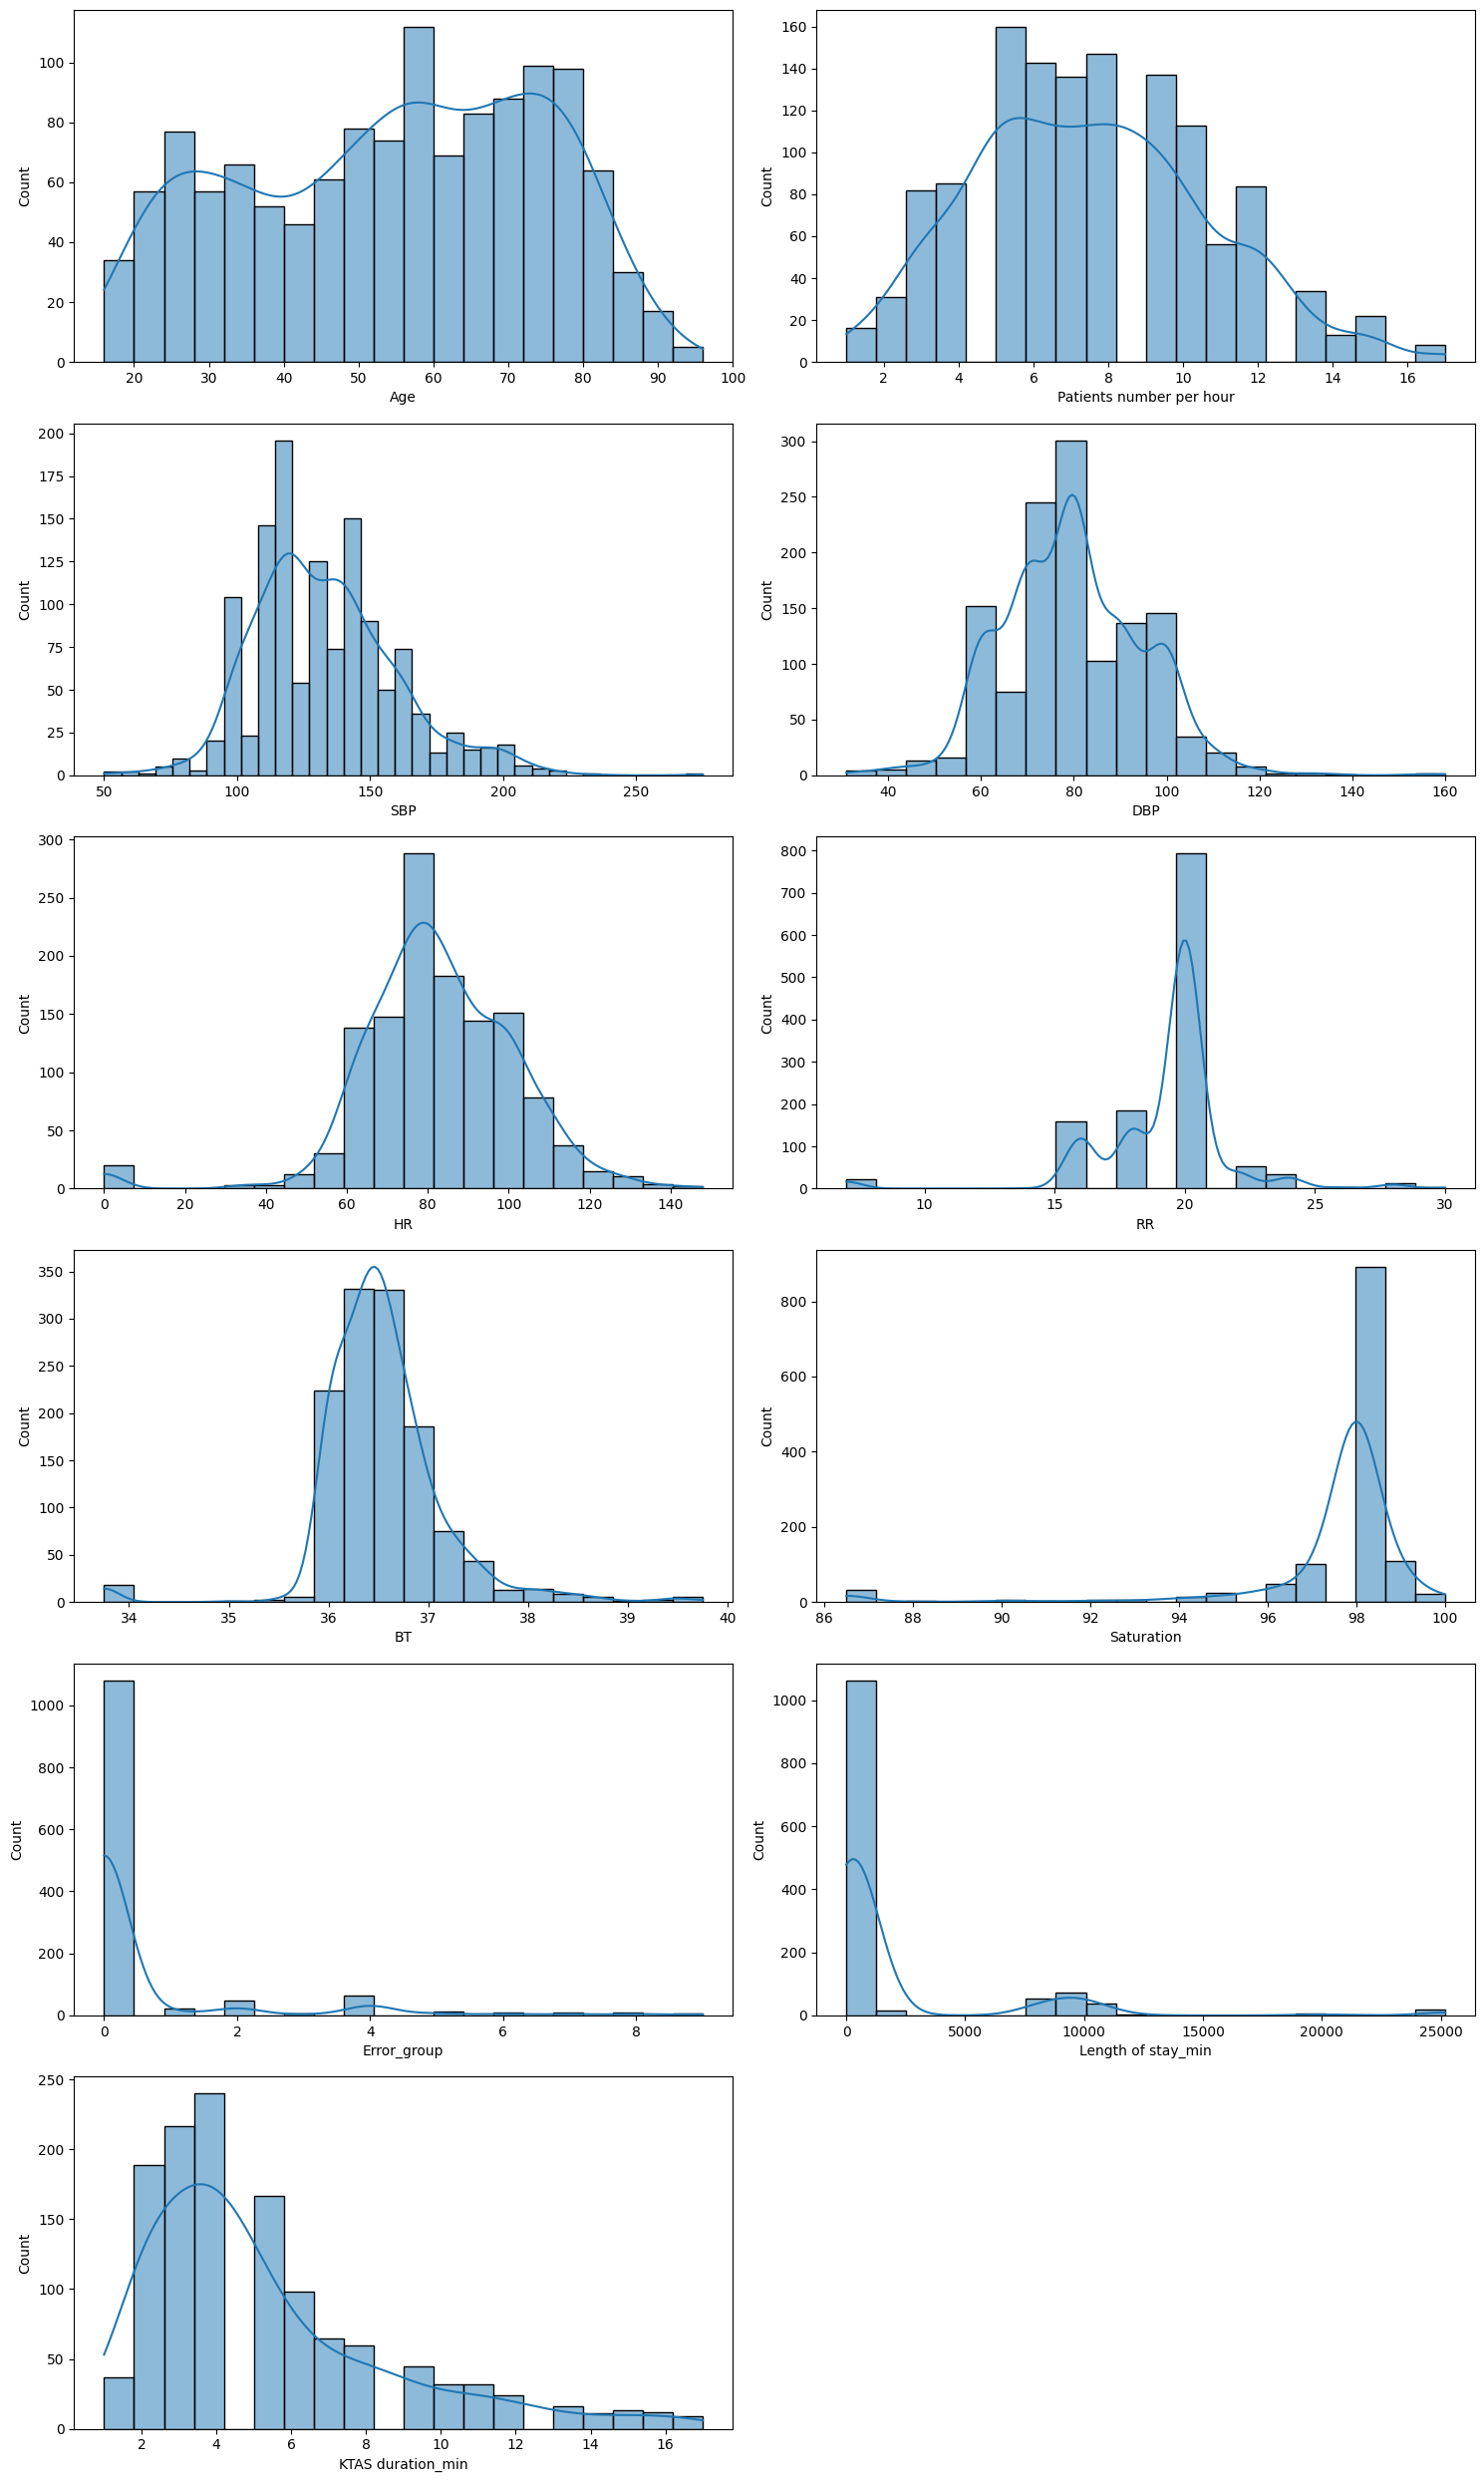

In [99]:
#DATA VISUALIZATION
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(6,2, figsize=(15,25))
sns.histplot(df['Age'], bins = 20, ax=ax[0,0], kde=True) 
sns.histplot(df['Patients number per hour'], bins = 20, ax=ax[0,1],kde=True) 
sns.histplot(df['SBP'],  ax=ax[1,0], kde=True) 
sns.histplot(df['DBP'], bins = 20, ax=ax[1,1], kde=True) 
sns.histplot(df['HR'], bins = 20, ax=ax[2,0], kde=True)
sns.histplot(df['RR'], bins = 20, ax=ax[2,1], kde=True)
sns.histplot(df['BT'], bins = 20, ax=ax[3,0], kde=True) 
sns.histplot(df['Saturation'], bins = 20, ax=ax[3,1], kde=True) 
sns.histplot(df['Error_group'], bins = 20, ax=ax[4,0], kde=True)
sns.histplot(df['Length of stay_min'], bins = 20, ax=ax[4,1], kde=True) 
sns.histplot(df['KTAS duration_min'], bins = 20, ax=ax[5,0], kde=True)
# Hide the last subplot
ax[5,1].set_visible(False)
plt.tight_layout()
plt.show()

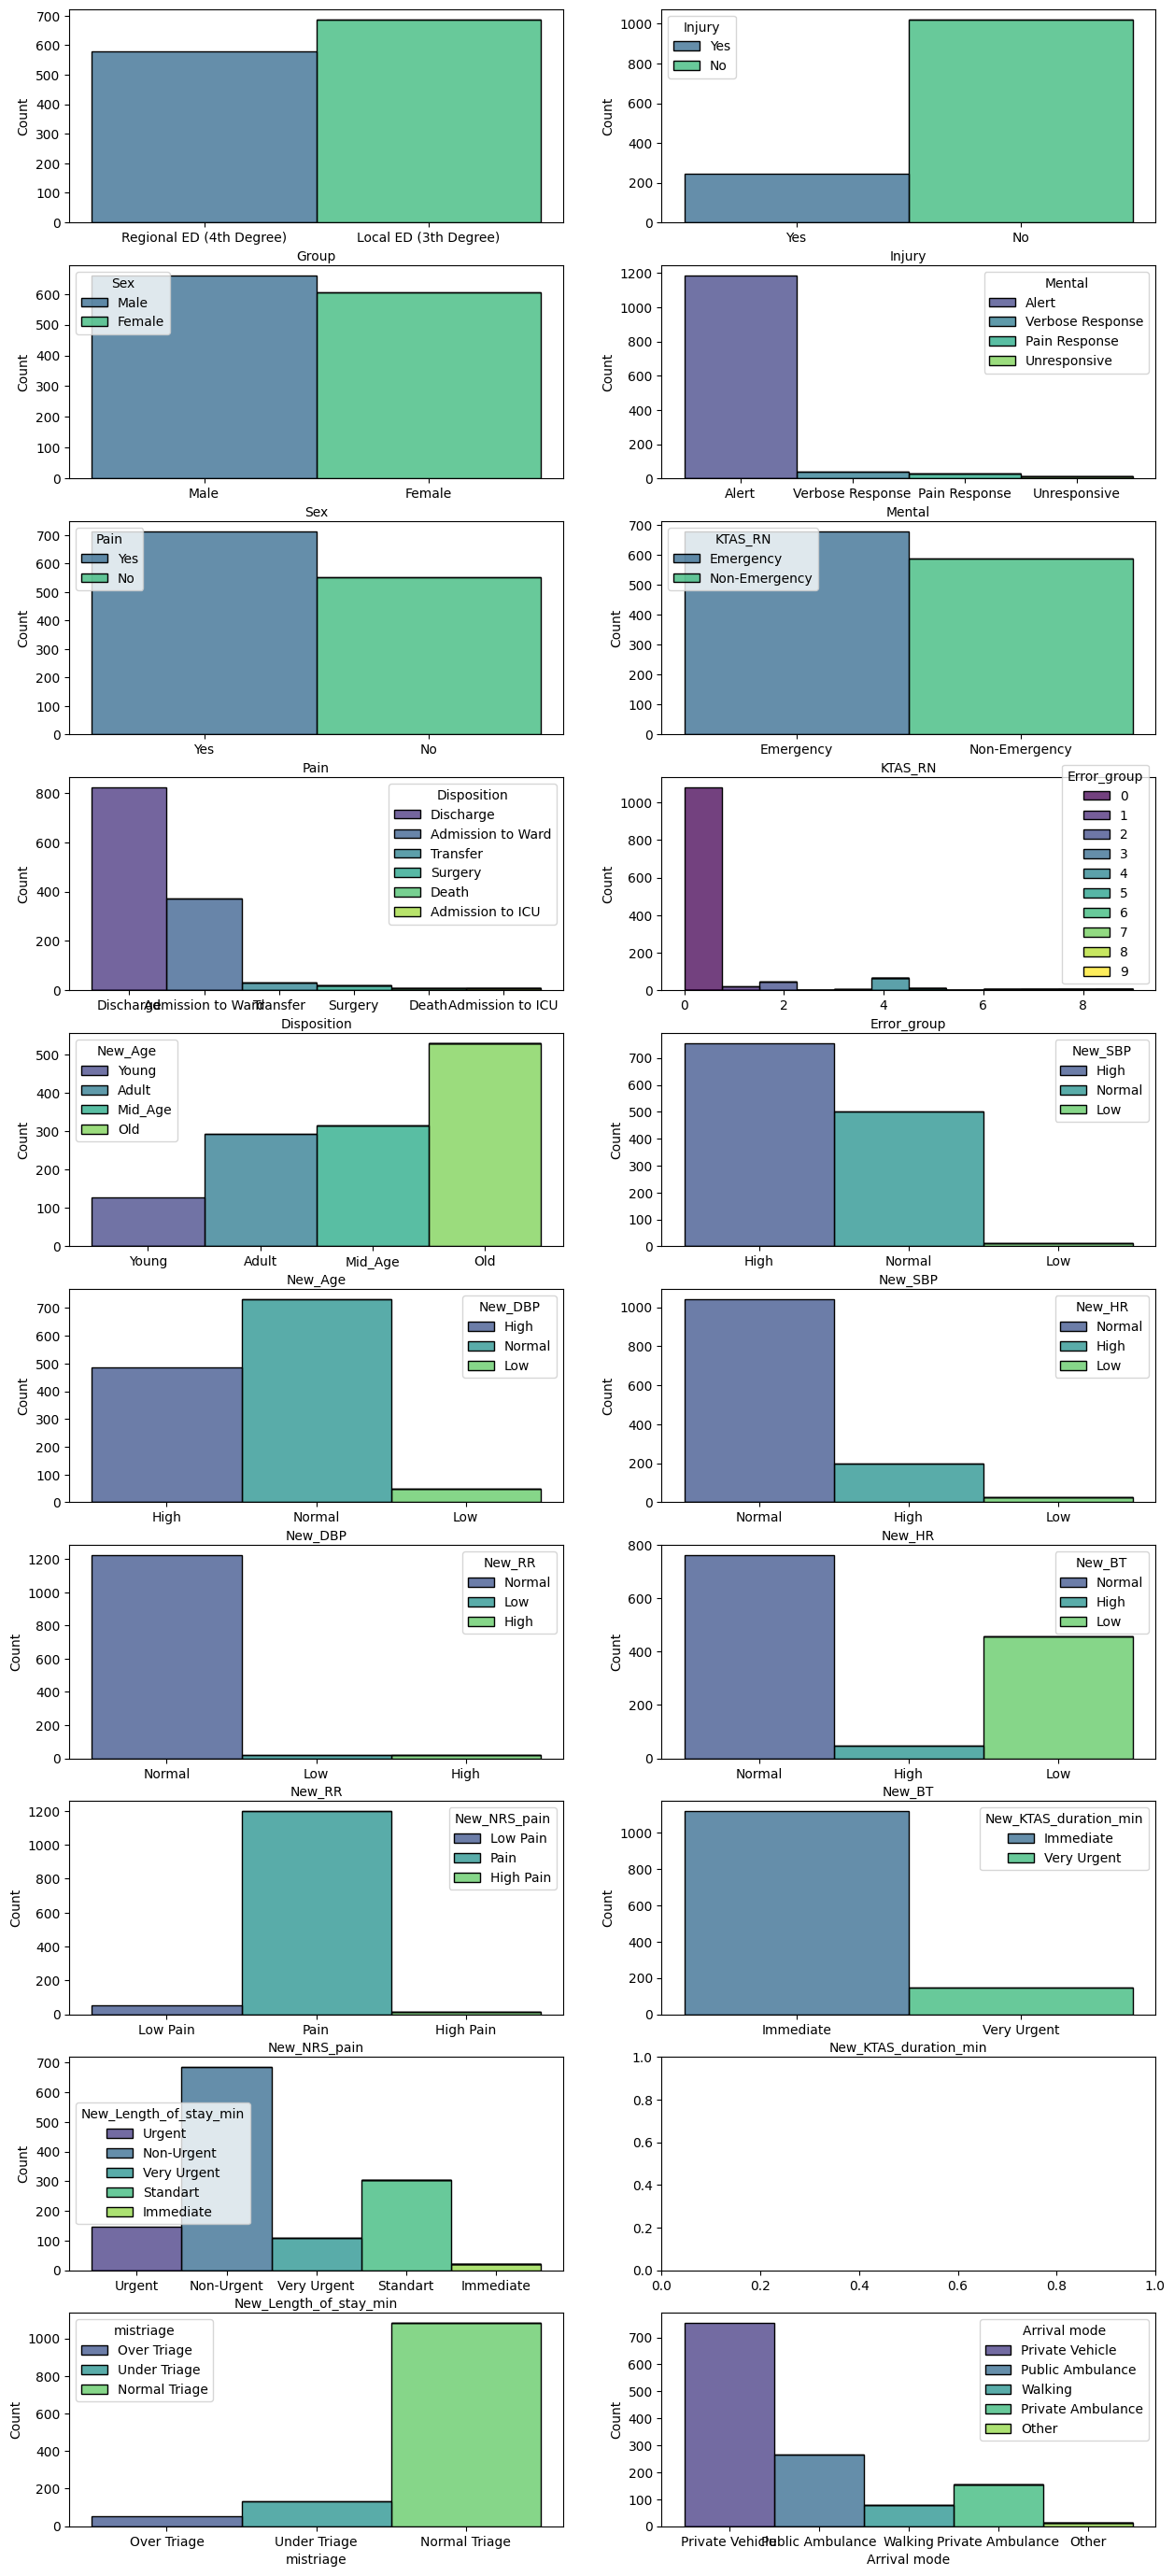

In [100]:

fig, ax = plt.subplots(10,2, figsize=(15,35))
sns.histplot(df , x='Group' ,hue= 'Group', multiple='stack', palette='viridis', kde=False, ax=ax[0,0],legend=False);
sns.histplot(df,x='Injury',hue='Injury', multiple='stack', palette='viridis', kde=False, ax=ax[0,1]);
sns.histplot(df,x='Sex',hue='Sex', multiple='stack', palette='viridis', kde=False, ax=ax[1,0]);
sns.histplot(df,x='Mental',hue='Mental', multiple='stack', palette='viridis', kde=False, ax=ax[1,1]);
sns.histplot(df,x='Pain',hue='Pain', multiple='stack', palette='viridis', kde=False, ax=ax[2,0]);
sns.histplot(df,x='KTAS_RN',hue='KTAS_RN', multiple='stack', palette='viridis', kde=False, ax=ax[2,1]);
sns.histplot(df,x='Disposition',hue='Disposition', multiple='stack', palette='viridis', kde=False, ax=ax[3,0]);
sns.histplot(df,x='Error_group',hue='Error_group', multiple='stack', palette='viridis', kde=False, ax=ax[3,1]);
sns.histplot(df,x='New_Age',hue='New_Age', multiple='stack', palette='viridis', kde=False, ax=ax[4,0]);
sns.histplot(df,x='New_SBP',hue='New_SBP', multiple='stack', palette='viridis', kde=False, ax=ax[4,1]);
sns.histplot(df,x='New_DBP',hue='New_DBP', multiple='stack', palette='viridis', kde=False, ax=ax[5,0]);
sns.histplot(df,x='New_HR',hue='New_HR', multiple='stack', palette='viridis', kde=False, ax=ax[5,1]);
sns.histplot(df,x='New_RR',hue='New_RR', multiple='stack', palette='viridis', kde=False, ax=ax[6,0]);
sns.histplot(df,x='New_BT',hue='New_BT', multiple='stack', palette='viridis', kde=False, ax=ax[6,1]);
sns.histplot(df,x='New_NRS_pain',hue='New_NRS_pain', multiple='stack', palette='viridis', kde=False, ax=ax[7,0]);
sns.histplot(df,x='New_KTAS_duration_min',hue='New_KTAS_duration_min', multiple='stack', palette='viridis', kde=False, ax=ax[7,1]);
sns.histplot(df,x='New_Length_of_stay_min',hue='New_Length_of_stay_min', multiple='stack', palette='viridis', kde=False, ax=ax[8,0]);
# sns.histplot(df,x='New_Saturation',hue='New_Saturation', multiple='stack', palette='viridis', kde=False, ax=ax[8,1]);
sns.histplot(df,x='mistriage',hue='mistriage', multiple='stack', palette='viridis', kde=False, ax=ax[9,0]);
sns.histplot(df,x='Arrival mode',hue='Arrival mode', multiple='stack', palette='viridis', kde=False, ax=ax[9,1]);



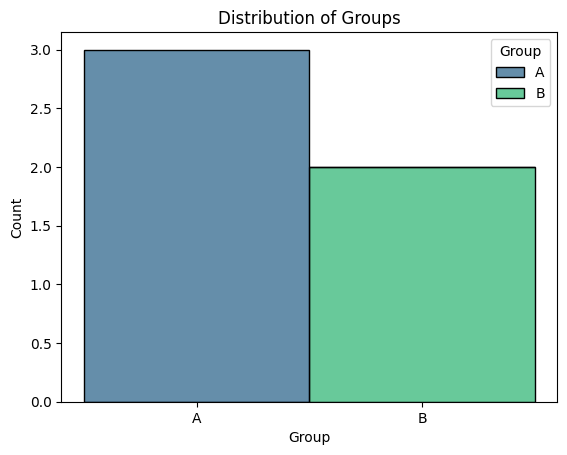

In [101]:
# 

# Sample data (replace with your actual df)
df = pd.DataFrame({
    'Group': ['A', 'B', 'A', 'B', 'A'],
    'species': ['X', 'Y', 'X', 'Y', 'X']
})

# Plot
sns.histplot(
    data=df,
    x='Group',
    hue='Group',
    multiple='stack',
    palette='viridis',
    kde=False
)
plt.title('Distribution of Groups')
plt.show()